In [15]:
import sys, os, re, gzip, json, pickle, shutil, random

import numpy as np
import sklearn
import matplotlib.pyplot as plt

%matplotlib inline
%config IPCompleter.greedy=True
%config Completer.use_jedi = False

In [16]:
#!{sys.executable} -m pip install librosa
#!{sys.executable} -m pip install pydub

In [17]:
from pydub.utils import mediainfo
from pydub import AudioSegment

import librosa
import librosa.display

import soundfile as sf

In [22]:
data_path = '../data'
myspace_mp3s_path = '%s/myspace_mp3s' % data_path
metadata_path = '%s/metadata.json.gz' % myspace_mp3s_path
genre_map_path = '%s/genre_map.pkl' % myspace_mp3s_path

features_path = '%s/audio_features' % data_path

### General helper methods

In [7]:
def get_mediainfo(path):
    return mediainfo(path)


def export_at_new_frame_rate(in_path, out_path, frame_rate, bitrate='128k'):
    sound = AudioSegment.from_file(in_path)
    sound = sound.set_frame_rate(frame_rate)
    sound.export(out_path, format="mp3", bitrate=bitrate)
    
    
def write_array_as_wav(arr, frame_rate, out_path):
    sf.write(out_path, arr, frame_rate, 'PCM_24')
    
    
def load_metadata(path):
    with gzip.open(path, 'rt', encoding='utf-8') as fz:
        metadata = json.load(fz)
    return metadata


def load_genre_map(path)
    with open(path, 'rb') as f:
        genre_map = pickle.load(f)
    return genre_map

### Load song metadata and genre map

In [20]:
metadata = load_metadata(metadata_path)
genre_map = load_genre_map(genre_map_path)

488550

### Extract and store mfcc features for all myspace mp3s, resorted into genre folders
###  by majority mapped genre.

In [44]:
def extract_mfcc(mp3_path, mfcc_features_path, metadata, genre_map):
    not_in_metadata = []
    bad_mp3s = []
    genre_cts = {g:0 for g in set(genre_map.values())}
    ttl=0
    
    for zip_folder in os.listdir(mp3_path):
        if not zip_folder.isdigit() or int(zip_folder)>21:
            continue
            
        zip_path = '%s/%s' % (mp3_path, zip_folder)
        
        for genre in os.listdir(zip_path):
            genre_path = '%s/%s' % (zip_path, genre)
            
            for fn in os.listdir(genre_path):
                if not fn.endswith('.mp3'):
                    continue
                    
                fp = '%s/%s' % (genre_path, fn)
                
                zip_num_filename = '%s/%s' % (zip_folder, fn)
                if zip_num_filename not in metadata:
                    not_in_metadata.append(zip_num_filename)
                    continue
                
                meta = metadata[zip_num_filename]
                if not 'genres' in meta or not meta['genres']:
                    continue
                    
                g = [genre_map[g] for g in meta['genres'] if g in genre_map]
                if not g:
                    continue
                    
                use_genre = g[0]
                for gn in g:
                    if g.count(gn)>1:
                        use_genre = gn
                        break
                g = use_genre
                
                gp = '%s/%s' % (mfcc_features_path, g)
                if not os.path.exists(gp):
                    print(g)
                    os.mkdir(gp)

                genre_cts[g]+=1
                    
                ttl+=1
                if ttl%100==0:
                    print('Total: %d, Not found: %d, Bad mp3s: %d' % (ttl, len(not_in_metadata), len(bad_mp3s)))
                
                arr_path = '%s/msp_%s_%s.npy' % (gp, zip_folder, fn.replace('.mp3', ''))
                if os.path.exists(arr_path):
                    continue
                
                try:
                    x, sr = librosa.load(fp)
                    x_mfcc = librosa.feature.mfcc(x, sr=sr)
                except Exception as ex:
                    bad_mp3s.append(zip_num_filename)
                    continue
                    
                np.save(arr_path, x_mfcc)
                
    return not_in_metadata, bad_mp3s

In [45]:
mfcc_features_path = '%s/mfcc' % features_path

not_in_metadata, bad_mp3s = extract_mfcc(myspace_mp3s_path, mfcc_features_path, metadata, genre_map)
len(not_in_metadata), len(bad_mp3s) #1852, 6

Total: 100, Not found: 0, Bad mp3s: 0
Total: 200, Not found: 0, Bad mp3s: 0
Total: 300, Not found: 0, Bad mp3s: 0
Total: 400, Not found: 0, Bad mp3s: 0
Total: 500, Not found: 0, Bad mp3s: 0
Total: 600, Not found: 0, Bad mp3s: 0
Total: 700, Not found: 0, Bad mp3s: 0
Total: 800, Not found: 0, Bad mp3s: 0
Total: 900, Not found: 0, Bad mp3s: 0
Total: 1000, Not found: 0, Bad mp3s: 0
Total: 1100, Not found: 0, Bad mp3s: 0
Total: 1200, Not found: 0, Bad mp3s: 0
Total: 1300, Not found: 0, Bad mp3s: 0
Total: 1400, Not found: 0, Bad mp3s: 0
Total: 1500, Not found: 0, Bad mp3s: 0
Total: 1600, Not found: 0, Bad mp3s: 0
Total: 1700, Not found: 0, Bad mp3s: 0
Total: 1800, Not found: 0, Bad mp3s: 0
Total: 1900, Not found: 0, Bad mp3s: 0
Total: 2000, Not found: 0, Bad mp3s: 0
Total: 2100, Not found: 0, Bad mp3s: 0
Total: 2200, Not found: 0, Bad mp3s: 0
Total: 2300, Not found: 0, Bad mp3s: 0
Total: 2400, Not found: 0, Bad mp3s: 0
Total: 2500, Not found: 0, Bad mp3s: 0
Total: 2600, Not found: 0, Bad mp3

Total: 20100, Not found: 689, Bad mp3s: 0
Total: 20200, Not found: 689, Bad mp3s: 0
Total: 20300, Not found: 689, Bad mp3s: 0
Total: 20400, Not found: 689, Bad mp3s: 0
Total: 20500, Not found: 689, Bad mp3s: 0
Total: 20600, Not found: 689, Bad mp3s: 0
Total: 20700, Not found: 689, Bad mp3s: 0
Total: 20800, Not found: 689, Bad mp3s: 1
Total: 20900, Not found: 689, Bad mp3s: 1
Total: 21000, Not found: 689, Bad mp3s: 1
Total: 21100, Not found: 689, Bad mp3s: 1
Total: 21200, Not found: 689, Bad mp3s: 1
Total: 21300, Not found: 689, Bad mp3s: 1
Total: 21400, Not found: 689, Bad mp3s: 1
Total: 21500, Not found: 689, Bad mp3s: 1
Total: 21600, Not found: 689, Bad mp3s: 1
Total: 21700, Not found: 689, Bad mp3s: 1
Total: 21800, Not found: 689, Bad mp3s: 1
Total: 21900, Not found: 689, Bad mp3s: 1
Total: 22000, Not found: 689, Bad mp3s: 1
Total: 22100, Not found: 689, Bad mp3s: 1
Total: 22200, Not found: 689, Bad mp3s: 1
Total: 22300, Not found: 689, Bad mp3s: 1
Total: 22400, Not found: 689, Bad 

c:\ml\env\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1078
  warnings.warn(


Total: 37100, Not found: 1201, Bad mp3s: 3


c:\ml\env\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=328
  warnings.warn(


Total: 37200, Not found: 1201, Bad mp3s: 3
Total: 37300, Not found: 1201, Bad mp3s: 3
Total: 37400, Not found: 1201, Bad mp3s: 3
Total: 37500, Not found: 1201, Bad mp3s: 3
Total: 37600, Not found: 1201, Bad mp3s: 3
Total: 37700, Not found: 1201, Bad mp3s: 3
Total: 37800, Not found: 1201, Bad mp3s: 3
Total: 37900, Not found: 1201, Bad mp3s: 3
Total: 38000, Not found: 1201, Bad mp3s: 3
Total: 38100, Not found: 1201, Bad mp3s: 3
Total: 38200, Not found: 1201, Bad mp3s: 3
Total: 38300, Not found: 1201, Bad mp3s: 3
Total: 38400, Not found: 1201, Bad mp3s: 3
Total: 38500, Not found: 1201, Bad mp3s: 3
Total: 38600, Not found: 1201, Bad mp3s: 3
Total: 38700, Not found: 1201, Bad mp3s: 3
Total: 38800, Not found: 1201, Bad mp3s: 3
Total: 38900, Not found: 1201, Bad mp3s: 3
Total: 39000, Not found: 1201, Bad mp3s: 3
Total: 39100, Not found: 1201, Bad mp3s: 3
Total: 39200, Not found: 1201, Bad mp3s: 3
Total: 39300, Not found: 1201, Bad mp3s: 3
Total: 39400, Not found: 1201, Bad mp3s: 3


c:\ml\env\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1152
  warnings.warn(


Total: 39500, Not found: 1201, Bad mp3s: 3
Total: 39600, Not found: 1201, Bad mp3s: 3
Total: 39700, Not found: 1201, Bad mp3s: 3
Total: 39800, Not found: 1201, Bad mp3s: 3
Total: 39900, Not found: 1327, Bad mp3s: 3
Total: 40000, Not found: 1327, Bad mp3s: 3
Total: 40100, Not found: 1327, Bad mp3s: 3
Total: 40200, Not found: 1327, Bad mp3s: 3
Total: 40300, Not found: 1327, Bad mp3s: 3
Total: 40400, Not found: 1327, Bad mp3s: 3
Total: 40500, Not found: 1327, Bad mp3s: 3
Total: 40600, Not found: 1327, Bad mp3s: 3
Total: 40700, Not found: 1327, Bad mp3s: 3
Total: 40800, Not found: 1327, Bad mp3s: 3
Total: 40900, Not found: 1327, Bad mp3s: 3
Total: 41000, Not found: 1327, Bad mp3s: 3
Total: 41100, Not found: 1327, Bad mp3s: 3
Total: 41200, Not found: 1327, Bad mp3s: 3
Total: 41300, Not found: 1327, Bad mp3s: 3
Total: 41400, Not found: 1327, Bad mp3s: 3
Total: 41500, Not found: 1327, Bad mp3s: 3
Total: 41600, Not found: 1327, Bad mp3s: 3
Total: 41700, Not found: 1327, Bad mp3s: 3
Total: 4180

c:\ml\env\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=288
  warnings.warn(


Total: 42900, Not found: 1327, Bad mp3s: 3
Total: 43000, Not found: 1327, Bad mp3s: 3
Total: 43100, Not found: 1327, Bad mp3s: 3
Total: 43200, Not found: 1327, Bad mp3s: 3
Total: 43300, Not found: 1327, Bad mp3s: 3
Total: 43400, Not found: 1327, Bad mp3s: 3
Total: 43500, Not found: 1327, Bad mp3s: 3
Total: 43600, Not found: 1327, Bad mp3s: 3
Total: 43700, Not found: 1327, Bad mp3s: 3
Total: 43800, Not found: 1327, Bad mp3s: 3
Total: 43900, Not found: 1327, Bad mp3s: 3
Total: 44000, Not found: 1444, Bad mp3s: 3
Total: 44100, Not found: 1444, Bad mp3s: 3
Total: 44200, Not found: 1444, Bad mp3s: 3
Total: 44300, Not found: 1444, Bad mp3s: 3
Total: 44400, Not found: 1444, Bad mp3s: 3
Total: 44500, Not found: 1444, Bad mp3s: 3
Total: 44600, Not found: 1444, Bad mp3s: 3
Total: 44700, Not found: 1444, Bad mp3s: 3
Total: 44800, Not found: 1444, Bad mp3s: 4
Total: 44900, Not found: 1444, Bad mp3s: 4
Total: 45000, Not found: 1444, Bad mp3s: 4
Total: 45100, Not found: 1444, Bad mp3s: 4
Total: 4520

c:\ml\env\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=861
  warnings.warn(


Total: 50900, Not found: 1581, Bad mp3s: 5
Total: 51000, Not found: 1581, Bad mp3s: 5
Total: 51100, Not found: 1581, Bad mp3s: 5
Total: 51200, Not found: 1581, Bad mp3s: 5
Total: 51300, Not found: 1581, Bad mp3s: 5
Total: 51400, Not found: 1581, Bad mp3s: 5
Total: 51500, Not found: 1581, Bad mp3s: 5
Total: 51600, Not found: 1581, Bad mp3s: 5
Total: 51700, Not found: 1581, Bad mp3s: 5
Total: 51800, Not found: 1581, Bad mp3s: 5
Total: 51900, Not found: 1581, Bad mp3s: 5
Total: 52000, Not found: 1702, Bad mp3s: 5
Total: 52100, Not found: 1702, Bad mp3s: 5
Total: 52200, Not found: 1702, Bad mp3s: 5
Total: 52300, Not found: 1702, Bad mp3s: 5
Total: 52400, Not found: 1702, Bad mp3s: 5
Total: 52500, Not found: 1702, Bad mp3s: 5
Total: 52600, Not found: 1702, Bad mp3s: 5
Total: 52700, Not found: 1702, Bad mp3s: 5
Total: 52800, Not found: 1702, Bad mp3s: 5
Total: 52900, Not found: 1702, Bad mp3s: 5
Total: 53000, Not found: 1702, Bad mp3s: 5
Total: 53100, Not found: 1702, Bad mp3s: 5
Total: 5320

(['1/clip_af4718f2a1271b1eaf9c454dd24a13e0.mp3',
  '1/std_02130316e2a0c92e05a1abb03ddf1968.mp3',
  '1/std_08617920e3975ee91a4cab556d28d625.mp3',
  '1/std_0a33a30bc4694132959ea9d2978d8153.mp3',
  '1/std_0c474fe469914f3ba3d5fa14da9d2ed5.mp3',
  '1/std_0d4039b065855290a4f1eb4bb5c966d1.mp3',
  '1/std_0ebe5b6563494381ae71e00c978697db.mp3',
  '1/std_0f0def57a29cfeb2b5fca2660877c94a.mp3',
  '1/std_11fede63d6664d00846d7e61e92533e9.mp3',
  '1/std_121945f23b784927bb193bf77b8e3189.mp3',
  '1/std_175172735e9f1b8adf4d8c4c73655d0c.mp3',
  '1/std_17809dc97c8c4754a6fb1b5ed5fcc489.mp3',
  '1/std_17a984cfa6b77229a508204133c8a185.mp3',
  '1/std_18409c4a532704e2d0a0a2033dfdfb05.mp3',
  '1/std_1983aa378f0e82d8d26a30dda5ae8a18.mp3',
  '1/std_1a3ac82df93b04e8cff613c660a39d31.mp3',
  '1/std_1c4e029aa3e95ec4ef4a12d0d58d2b54.mp3',
  '1/std_1e886fe648c9470fb7faa919b508f3dc.mp3',
  '1/std_1e9f6a79c70941a5a641c6c5358fdd87.mp3',
  '1/std_1f7eab8b35d4898fd7d4d2619e1533b7.mp3',
  '1/std_22a7a590d54fdefc1865b7ebb069d7

In [46]:
# get counts of song features per genre

genre_cts = {}
for genre in os.listdir(mfcc_features_path):
    genre_path = '%s/%s' % (mfcc_features_path, genre)
    genre_cts[genre] = len(os.listdir(genre_path))
    
for g in sorted(genre_cts, key=genre_cts.get, reverse=True):
    print(g, genre_cts[g])

rock 9535
alternative 7056
metal 6609
dance 3620
rap 3392
pop 3216
jazz 3118
hip_hop 2764
experimental 2624
other 2548
world 1611
electronic 1468
folk 1337
punk 1315
blues 1033
ambient 977
reggae 775
goth 514
acoustic 488
country 365
classical 357
house 298
spiritual 273
progressive 157
oldies 155
funk 108
spoken_word 101
easy_listening 86
bluegrass 40
industrial 32
showtunes 25
disco 18


In [37]:
# look at shape of mfcc feature
# each will have a different number of columns depending on the length of the song

a = np.load('../data/audio_features/mfcc/acoustic/msp_1_std_1122d843b0e59730733c0fb9d59fd82e.npy')
a.shape  #(20, 17381)

(20, 17381)

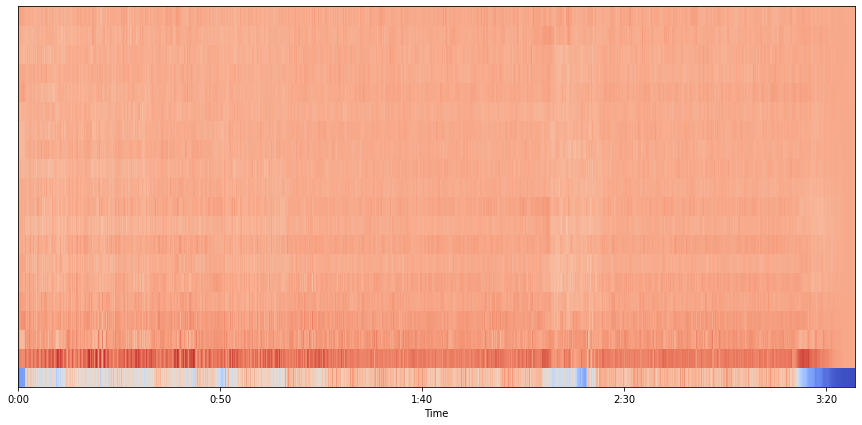

In [30]:
# view a spectrogram for a random mfcc

x, sr = librosa.load('../data/myspace_mp3s/21/acoustic/std_0316c16c7ea854e64d7d20ca9ef88b05.mp3')
x_mfcc = librosa.feature.mfcc(x, sr=sr)

#(20, 8921),
print(x_mfcc.shape, x_mfcc.min(), x_mfcc.max(), x_mfcc.mean(), x_mfcc.std(), x_mfcc[:,:5])

plt.figure(figsize=(15, 7))
librosa.display.specshow(x_mfcc, sr=sr, x_axis='time')

In [ ]:
def extract_genre_features(data, genre, local_mp3s_path, sample_rate=44100, max_mb=5,
                     features=['waveform', 'spectrogram', 'melspectrogram', 'spectral_centroids',
                               'spectral_rolloff', 'spectral_bandwidth_2', 'spectral_bandwidth_3',
                               'spectral_bandwidth_4', 'zero_crossings', 'mfcc', 'chromagram']):
    '''Extracts features from files in genre folder'''
    file_feats = {}
    
    gp = '%s/%s' % (local_mp3s_path, genre)
    for fn in os.listdir(gp):
        if not fn.endswith('.mp3'):
            continue
            
        if not fn in data:
            print('File %s not in metadata!' % fn)
            continue
            
        if 'size_mb' in data[fn] and data[fn]['size_mb'] > max_mb:
            continue

        fp = '%s/%s' % (gp, fn)

        feats = extract_features_from_file(fp, features)

        file_feats[fn] = feats
            
    return file_feats
            
            
def extract_features_from_file(fp, features):
    feats = {}
    x, sr = librosa.load(fp)
    
    if 'spectrogram' in features:
        x_spectrogram = librosa.stft(x)
        x_spectrogram = librosa.amplitude_to_db(abs(x_spectrogram))
        feats['spectrogram'] = x_spectrogram
        
    if 'melspectrogram' in features:
        x_melspectrogram = librosa.feature.melspectrogram(x, sr=sr, n_mels=128, fmin=20, fmax=16000)
        x_melspectrogram = librosa.power_to_db(x_melspectrogram, ref=np.max)
        feats['melspectrogram'] = x_melspectrogram
        
    if 'spectral_centroids' in features:
        #frames len
        x_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
        x_centroids = normalize(spectral_centroids)
        feats['spectral_centroids'] = x_centroids
        
    if 'spectral_rolloff' in features:
        x_rolloff = librosa.feature.spectral_rolloff(x+0.01, sr=sr)[0]
        x_rolloff = normalize(spectral_rolloff)
        feats['spectral_rolloff'] = x_rolloff
     
    if 'spectral_bandwidth_2' in features:
        #p = Power to raise deviation from spectral centroid.
        x_bandwidth_2 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr)[0]
        feats['spectral_bandwidth_2'] = x_bandwidth_2
        
    if 'spectral_bandwidth_3' in features:
        x_bandwidth_3 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=3)[0]
        feats['spectral_bandwidth_3'] = x_bandwidth_3
            
    if 'spectral_bandwidth_4' in features:
        x_bandwidth_4 = librosa.feature.spectral_bandwidth(x+0.01, sr=sr, p=4)[0]
        feats['spectral_bandwidth_4'] = x_bandwidth_4
        
    if 'zero_crossings' in features:
        x_crossings = librosa.zero_crossings(x, pad=False)
        feats['zero_crossings'] = x_crossings
        
    #Mel-Frequency Cepstral Coefficients (MFCCs)
    if 'mfcc' in features:
        x_mfcc = librosa.feature.mfcc(x, sr=sr)
        feats['mfcc'] = x_mfcc
        
    if 'chromagram' in features:
        hop_length=512
        x_chromagram = librosa.feature.chroma_stft(x, sr=sr, hop_length=hop_length)
        feats['chromagram'] = x_chromagram
    
    return feats

        
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)